<a href="https://colab.research.google.com/github/msalvati1997/mushrooms_classificator/blob/main/mushroom.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mushrooooms : come predire la velenosità di un fungo



## Obiettivi del progetto

## 1 Analisi dei dati


### 1.1 Importazione librerie

In [1]:
import numpy as np
import pandas as pd 
import scipy.stats as stats
import seaborn as sns

from sklearn import preprocessing
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV
from sklearn.feature_selection import mutual_info_classif, f_classif, SelectKBest
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, FunctionTransformer
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score, roc_curve 
from sklearn.metrics import f1_score, precision_recall_fscore_support, roc_auc_score, make_scorer, auc
from sklearn.linear_model import LogisticRegression

IS_COLAB = ('google.colab' in str(get_ipython()))

from IPython.display import Image
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib import cm

plt.style.use('fivethirtyeight')

plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.serif'] = 'Ubuntu'
plt.rcParams['font.monospace'] = 'Ubuntu Mono'
plt.rcParams['font.size'] = 10
plt.rcParams['axes.labelsize'] = 10
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['axes.titlesize'] = 10
plt.rcParams['xtick.labelsize'] = 8
plt.rcParams['ytick.labelsize'] = 8
plt.rcParams['legend.fontsize'] = 10
plt.rcParams['figure.titlesize'] = 12
plt.rcParams['image.cmap'] = 'jet'
plt.rcParams['image.interpolation'] = 'none'
plt.rcParams['figure.figsize'] = (16, 8)
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['lines.markersize'] = 8

colors = ['xkcd:pale orange', 'xkcd:sea blue', 'xkcd:pale red', 'xkcd:sage green', 'xkcd:terra cotta', 'xkcd:dull purple', 'xkcd:teal', 'xkcd:goldenrod', 'xkcd:cadet blue', 
          'xkcd:scarlet']
mpl.rcParams['axes.prop_cycle'] = mpl.cycler(color=colors) 
cmap_big = cm.get_cmap('Spectral', 512)
cmap = mcolors.ListedColormap(cmap_big(np.linspace(0.7, 0.95, 256)))



### 1.2 Dataset


In [ ]:
if IS_COLAB:
    df = pd.read_excel("https://raw.githubusercontent.com/msalvati1997/mushrooms_classificator/main/secondary_data_generated.xlsx") 


In [ ]:
df

,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,p,15.26,x,g,o,f,e,NaN,w,16.95,...,s,y,w,u,w,t,g,NaN,d,w
1,p,16.60,x,g,o,f,e,NaN,w,17.99,...,s,y,w,u,w,t,g,NaN,d,u
2,p,14.07,x,g,o,f,e,NaN,w,17.80,...,s,y,w,u,w,t,g,NaN,d,w
3,p,14.17,f,h,e,f,e,NaN,w,15.77,...,s,y,w,u,w,t,p,NaN,d,w
4,p,14.64,x,h,o,f,e,NaN,w,16.53,...,s,y,w,u,w,t,p,NaN,d,w
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61064,p,1.18,s,s,y,f,f,f,f,3.93,...,NaN,NaN,y,NaN,NaN,f,f,NaN,d,a
61065,p,1.27,f,s,y,f,f,f,f,3.18,...,NaN,NaN,y,NaN,NaN,f,f,NaN,d,a
61066,p,1.27,s,s,y,f,f,f,f,3.86,...,NaN,NaN,y,NaN,NaN,f,f,NaN,d,u
61067,p,1.24,f,s,y,f,f,f,f,3.56,...,NaN,NaN,y,NaN,NaN,f,f,NaN,d,u


In [ ]:
df.shape

(61069, 21)

Feature | Meaning
------ | ------
cap-diameter (m)| float number in cm
cap-shape (n)| bell=b, conical=c, convex=x, flat=f, sunken=s,spherical=p, others=o
cap-surface (n)| fibrous=i, grooves=g, scaly=y, smooth=s,shiny=h,leathery=l, silky=k, sticky=t,wrinkled=w, fleshy=e
cap-color (n)| brown=n, buff=b, gray=g, green=r, pink=p,purple=u, red=e, white=w, yellow=y, blue=l,orange=o, black=k
does-bruise-bleed (n)| bruises-or-bleeding=t,no=f
gill-attachment (n)| adnate=a, adnexed=x, decurrent=d, free=e,sinuate=s, pores=p, none=f, unknown=?
gill-spacing (n)|close=c, distant=d, none=f
gill-color (n)| see cap-color + none=f
stem-height (m)| float number in cm
stem-width (m)| float number in mm
stem-root (n)| bulbous=b, swollen=s, club=c, cup=u, equal=e,rhizomorphs=z, rooted=r
stem-surface (n)| see cap-surface + none=f
stem-color (n)| see cap-color + none=f
veil-type (n)| partial=p, universal=u
veil-color (n)| see cap-color + none=f
has-ring (n)| ring=t, none=f
ring-type (n)| cobwebby=c, evanescent=e, flaring=r, grooved=g,large=l,pendant=p, sheathing=s, zone=z, scaly=y, movable=m, none=f, unknown=?
spore-print-color (n)| see cap color
habitat (n)| grasses=g, leaves=l, meadows=m, paths=p, heaths=h,urban=u,waste=w, woods=d
season (n)| spring=s, summer=u, autumn=a, winter=w




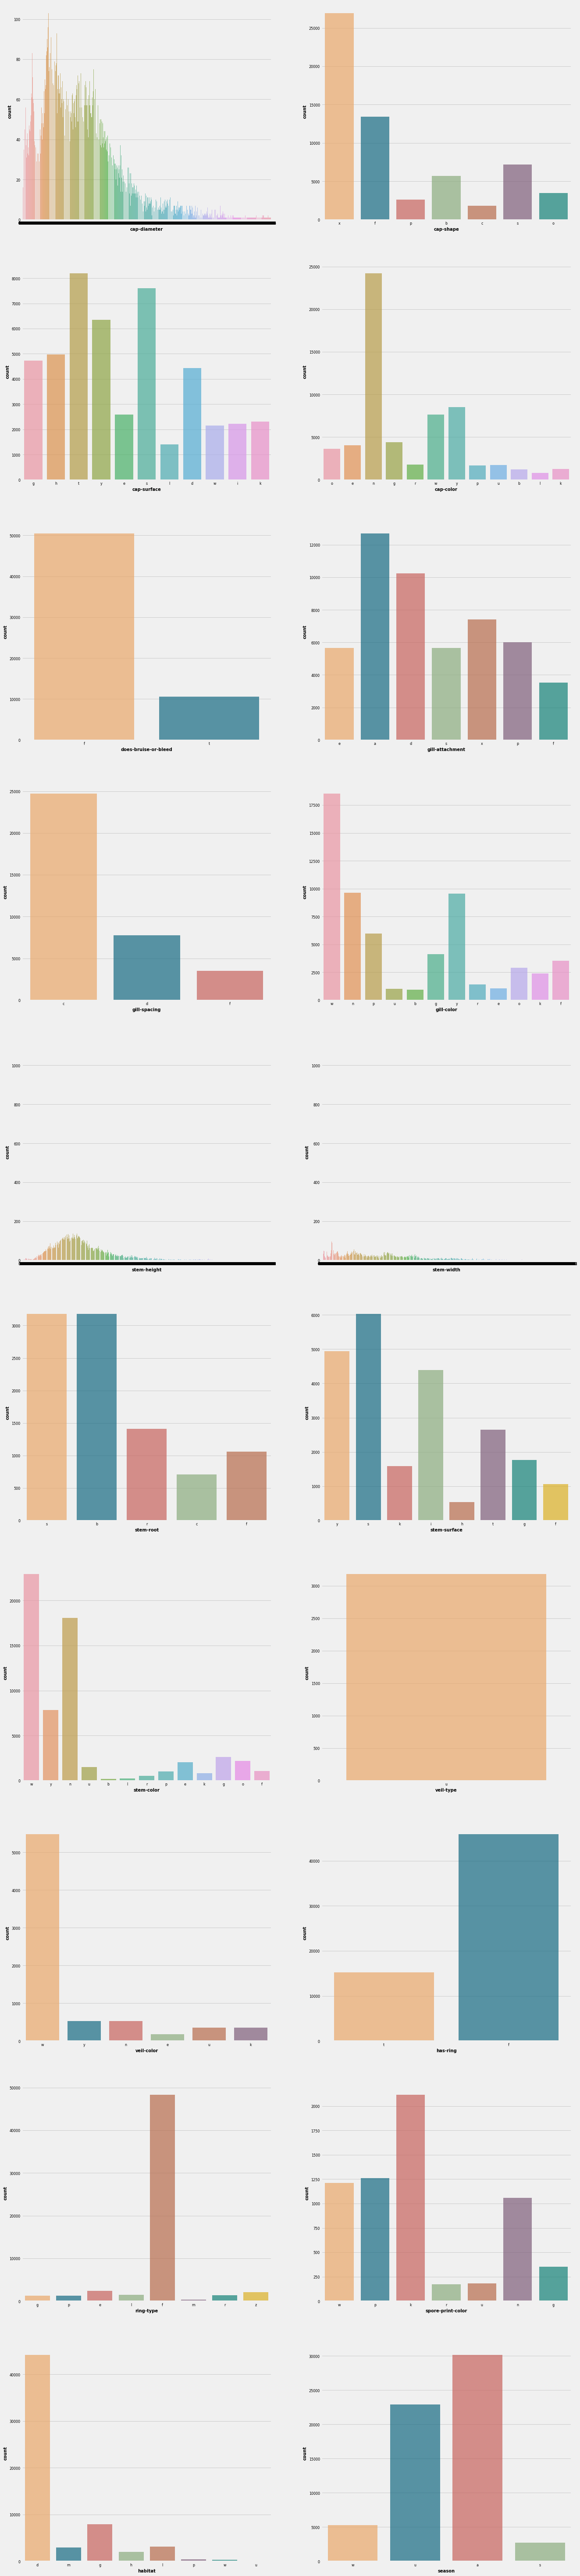

In [ ]:
categ =  ['cap-diameter', 'cap-shape', 'cap-surface', 'cap-color', 'does-bruise-or-bleed', 'gill-attachment', 'gill-spacing','gill-color','stem-height','stem-width','stem-root','stem-surface','stem-color','veil-type','veil-color','has-ring','ring-type','spore-print-color','habitat','season']
conti = ['class']

#Distribution
fig = plt.figure(figsize=(20, 100))
for i in range (0,len(categ)):
    fig.add_subplot(10,2,i+1)
    sns.countplot(x=categ[i], data=df, alpha=.7) 

plt.show()

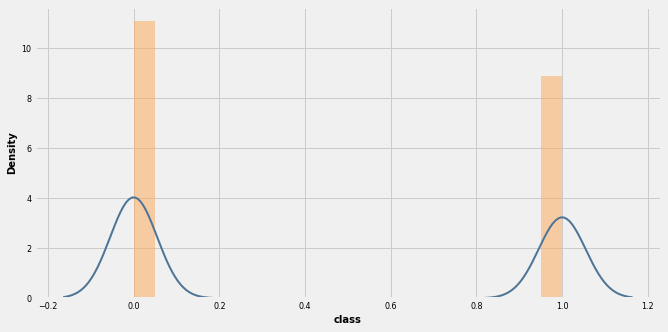

In [ ]:
#Distribution plot
#In pratica il problema era che per fare il distplot serve avere dei float, non si può fare con variabili nominali
fig = plt.figure(figsize=(10, 5))

df2 = df['class']
df2 = df2.replace(['p'],'0')
df2 = df2.replace(['e'],'1')

sns.distplot(df2, kde_kws={"lw": 2, "color":colors[8]}, 
                 hist_kws={"alpha": .5})

plt.show()

In [ ]:
def cond_prob(feature):
    r = df[df[feature].notnull()][feature].unique()
    p = []
    for val in r:
        joint = df[(df[feature]==val) & (df['class']=='e')].shape[0]
        pre = df[(df[feature]==val)].shape[0]
        post_1 = joint/pre
        p.append([val, post_1])
    return pd.DataFrame(p, columns=['value','prob'])

In [ ]:
#Probabilità che un fungo sia commestibile a partire dalla cap-shape
cp = cond_prob('veil-type')
cp

,value,prob
0,u,0.333333


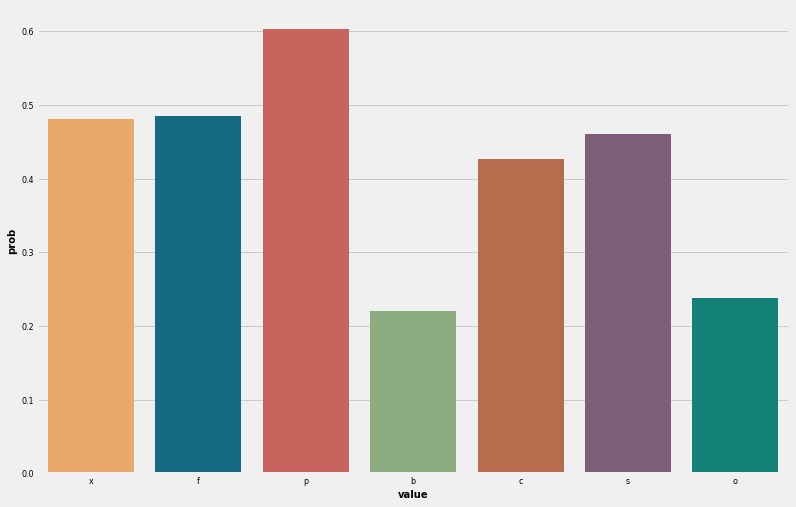

In [ ]:
#Documentazione: https://seaborn.pydata.org/generated/seaborn.barplot.html
cp = cond_prob('cap-shape')
fig = plt.figure(figsize=(12, 8))
sns.barplot(data=cp, x=cp.columns[0], y=cp.columns[1])
plt.show()

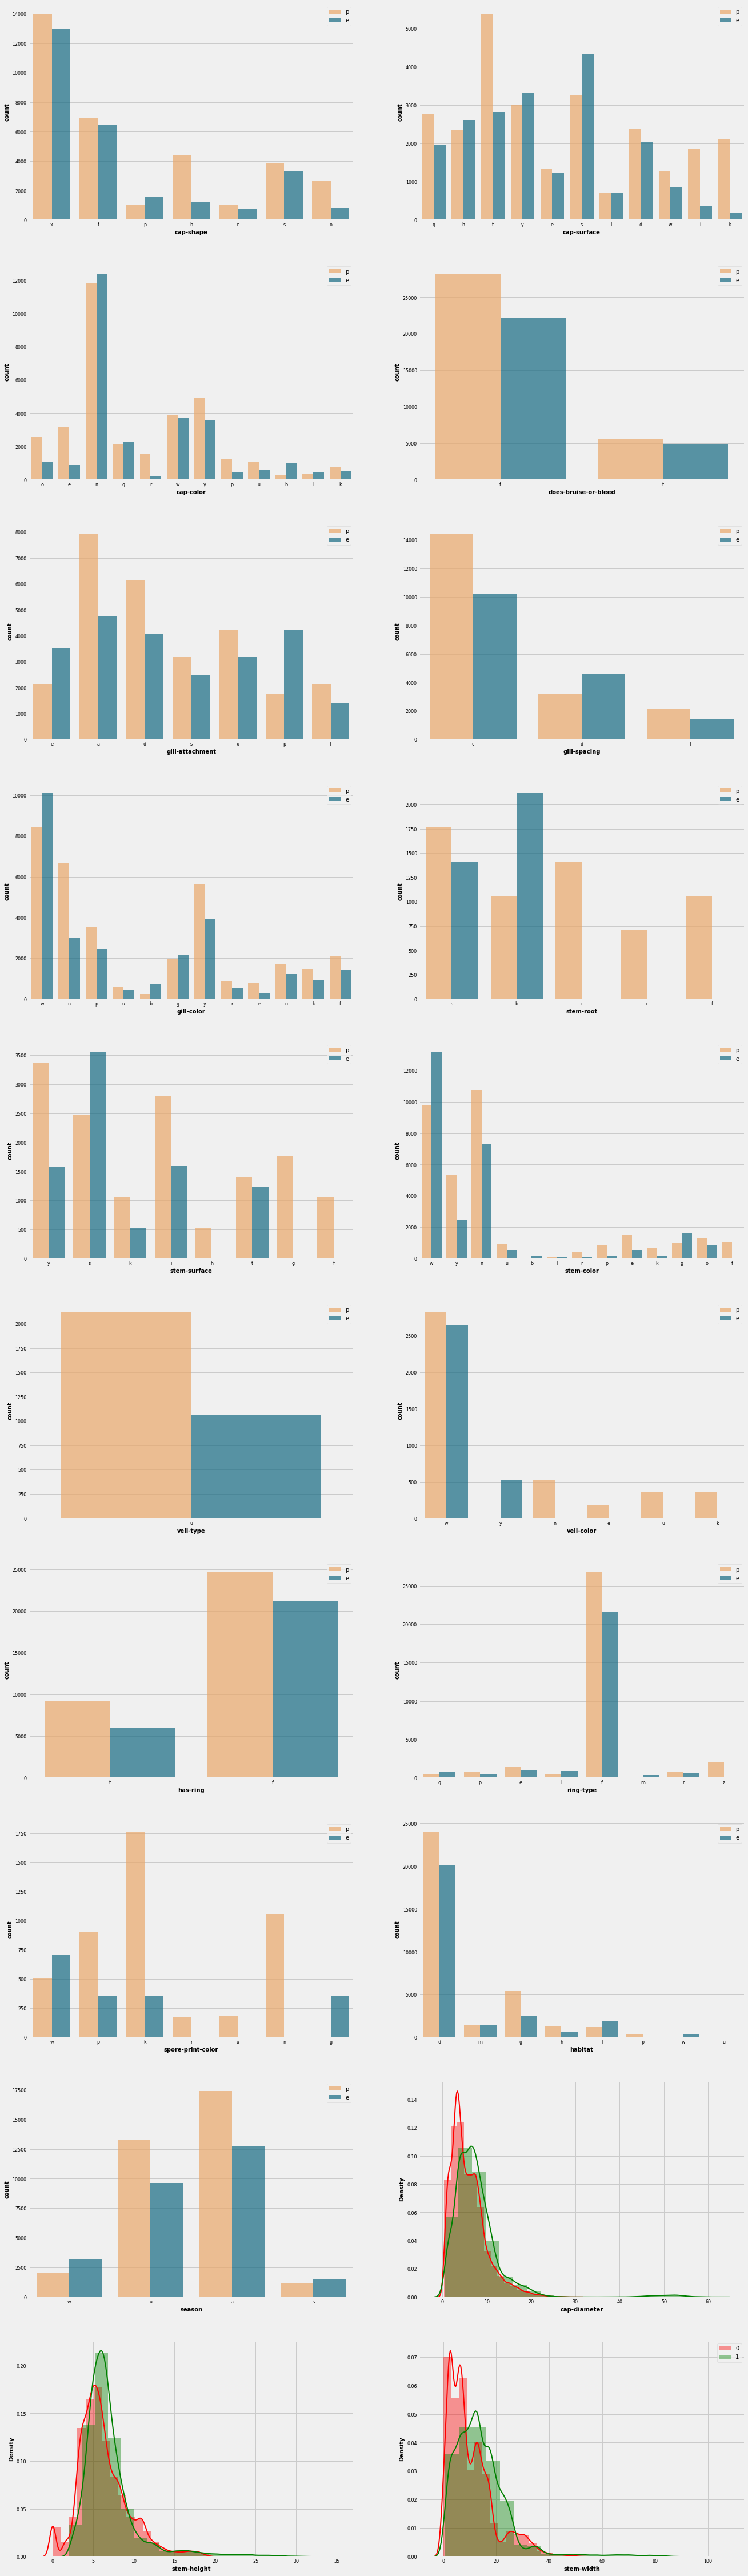

In [ ]:
fig = plt.figure(figsize=(20, 100))
i = 1
for col in categ:
    if col != 'class' and col != 'cap-diameter' and col != 'stem-height' and col != 'stem-width'  :
        fig.add_subplot(13,2,i)
        g = sns.countplot(x=col, data=df,hue='class', alpha=.7)
        plt.legend(loc=1) 
        i += 1

# Box plot survived x age
fig.add_subplot(13,2,18)
#sns.swarmplot(x="Survived", y="Age", hue="Sex", alpha=.7, data=df)
sns.distplot(df[df['class']=='p']['cap-diameter'].dropna(), bins = 20, kde_kws={"lw": 2}, 
                 hist_kws={"alpha": .4}, label='0', color='red')
sns.distplot(df[df['class']=='e']['cap-diameter'].dropna(), bins = 20, kde_kws={"lw": 2}, 
                 hist_kws={"alpha": .4}, label='1', color='green')
fig.add_subplot(13,2,19)
sns.distplot(df[df['class']=='p']['stem-height'].dropna(), bins = 20, kde_kws={"lw": 2}, 
                 hist_kws={"alpha": .4}, label='0', color='red')
sns.distplot(df[df['class']=='e']['stem-height'].dropna(), bins = 20, kde_kws={"lw": 2}, 
                 hist_kws={"alpha": .4}, label='1', color='green')
fig.add_subplot(13,2,20)
sns.distplot(df[df['class']=='p']['stem-width'].dropna(), bins = 20, kde_kws={"lw": 2}, 
                 hist_kws={"alpha": .4}, label='0', color='red')
sns.distplot(df[df['class']=='e']['stem-width'].dropna(), bins = 20, kde_kws={"lw": 2}, 
                 hist_kws={"alpha": .4}, label='1', color='green')

plt.legend()
plt.show()

In [ ]:
a = df.columns[df.isna().any()].tolist()
for i in a :
    print( i  ,'-> null : {0:d} '.format(sum(pd.isnull(df[i]))))
    print(i , '-> ratio: {0:5.3f}'.format(sum(pd.isnull(df[i]))/df.shape[0]))
    print('')

cap-surface -> null : 14120 
cap-surface -> ratio: 0.231

gill-attachment -> null : 9884 
gill-attachment -> ratio: 0.162

gill-spacing -> null : 25063 
gill-spacing -> ratio: 0.410

stem-root -> null : 51538 
stem-root -> ratio: 0.844

stem-surface -> null : 38124 
stem-surface -> ratio: 0.624

veil-type -> null : 57892 
veil-type -> ratio: 0.948

veil-color -> null : 53656 
veil-color -> ratio: 0.879

ring-type -> null : 2471 
ring-type -> ratio: 0.040

spore-print-color -> null : 54715 
spore-print-color -> ratio: 0.896



In [ ]:
#df['stem-root'] = df['stem-root'].fillna(df['stem-root']=="unknown")

In [ ]:
print('Number of edible mushrooms: {0:d}'.format(df[df['class']=='e'].shape[0]))
print('Number of poisonous mushrooms : {0:d}'.format(df[df['class']=='p'].shape[0]))
print('Fraction of edible mushrooms: {0:3.2f}'.format(df[df['class']=='e'].shape[0]/df.shape[0]))

Number of edible mushrooms: 27181
Number of poisonous mushrooms : 33888
Fraction of edible mushrooms: 0.45


In [ ]:
#categ2 =  ['cap-shape', 'cap-surface', 'cap-color', 'does-bruise-or-bleed', 'gill-attachment', 'gill-spacing','gill-color','stem-root','stem-surface','stem-color','veil-type','veil-color','has-ring','ring-type','spore-print-color','habitat','season']
#df = pd.get_dummies(df,drop_first=True,columns=categ2)
# x = df.drop(['class'],axis=1)
#print(x.head())

#scaler = StandardScaler()
#scaler = scaler.fit(x)
#X_s = pd.DataFrame(scaler.transform(x), columns=x.columns)

#print(X_s)

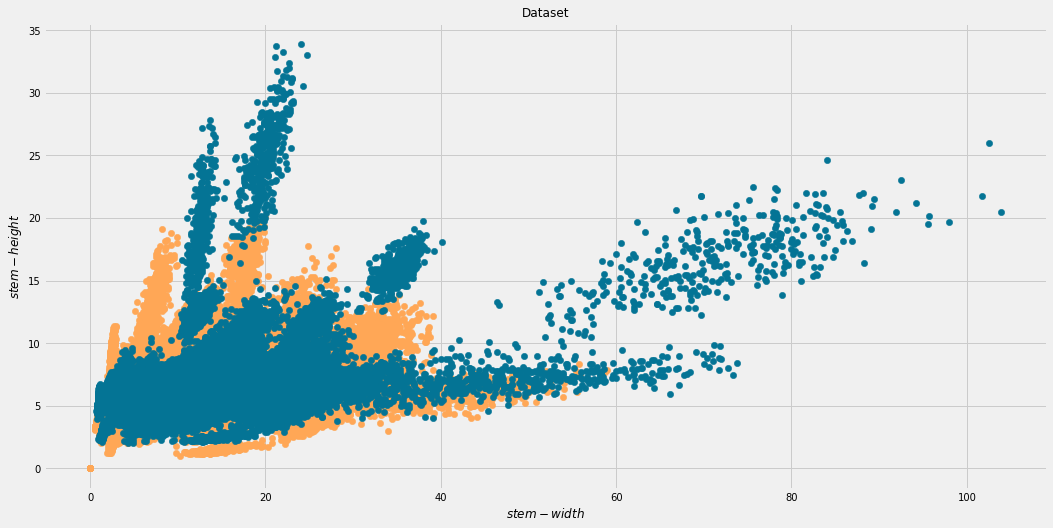

In [ ]:
fig = plt.figure(figsize=(16,8))
ax = fig.gca()
ax.scatter(df[df['class']=='p']['stem-width'], df[df['class']=='p']['stem-height'], s=40, c=colors[0])
ax.scatter(df[df['class']=='e']['stem-width'], df[df['class']=='e']['stem-height'], s=40,c=colors[1])
plt.xlabel('$stem-width$', fontsize=12)
plt.ylabel('$stem-height$', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.title('Dataset', fontsize=12)
plt.show()

### 1.3 Bilanciamento


### 1.4 Correlazione

### 1.5 Valutazione funghi velenosi

### 1.6 Valutazione features

#### 1.6.1 Cap-diameter

## 2 Manipolazione dati

## 2.1 